Outliers present in the data: [50]


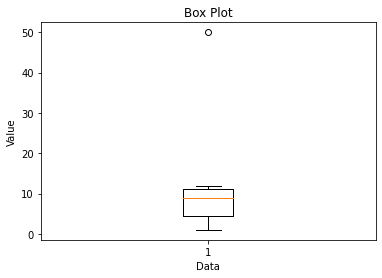

In [3]:
import numpy as np
# part A
data = [11, 3, 8, 10, 12, 5, 1, 50]

# sorted the data in ascending order
data.sort() 

# calculated the first quartile
Q1 = np.percentile(data, 25)  
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)

# # Next we calculate interquartile ranges and upper/ lower bounds
IQR = Q3 - Q1  
lower_bn = Q1 - (1.5 * IQR)
upper_bn = Q3 + (1.5 * IQR)

# # Find the outliers in the data
outliers = [x for x in data if x < lower_bn or x > upper_bn]

print("Outliers present in the data:", outliers)

import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(data)

# Add a title and axis labels
plt.title("Box Plot")
plt.xlabel("Data")
plt.ylabel("Value")

# Show the plot
plt.show()



Mean:  9.411764705882353
Standard Deviation:  10.933267223475825
Z_scores:  [-0.3120535368015737, -0.5864454398512333, -0.03766163375191409, -0.3120535368015737, -0.03766163375191409, 0.9684420107635046, -0.5864454398512333, 0.05380233393130578, -0.5864454398512333, 3.7123610412601007, -0.3120535368015737, -0.4035175044847936, -0.03766163375191409, -0.03766163375191409, -0.5864454398512333, -0.3120535368015737, -0.5864454398512333]
Outliers:  [50]


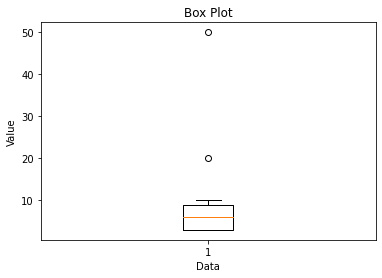

In [4]:
# part B
import numpy as np
import matplotlib.pyplot as plt

data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]

mean = np.mean(data)
std = np.std(data)

z_scores = [(x - mean) / std for x in data]
outlier = [(x - mean) / std > 3 for x in data]
outlier = [int(out)*x for out,x in zip(outlier,data) if int(out)*x > 0]

z_scores = [(x - mean) / std for x in data]
outliers = [x for x, z in zip(data, z_scores) if abs(z) > 3]

print("Mean: ", mean)
print("Standard Deviation: ", std)
print("Z_scores: ", z_scores)
print("Outliers: ", outlier)


# Create the box plot
# box plot uses IQR/ Quartiles for the box plot and identifying outliers
plt.boxplot(data)


plt.title("Box Plot")
plt.xlabel("Data")
plt.ylabel("Value")

# Show the plot
plt.show()


MSSubClass



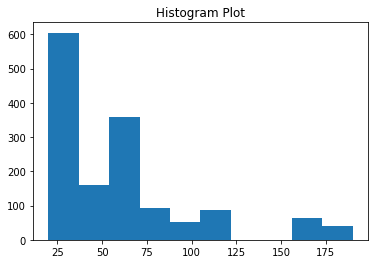

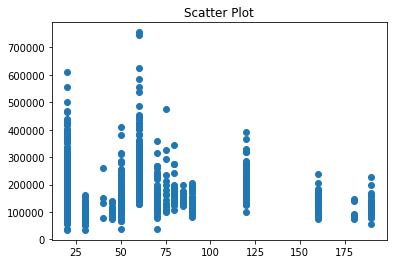


LotFrontage



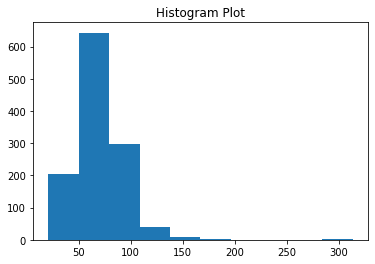

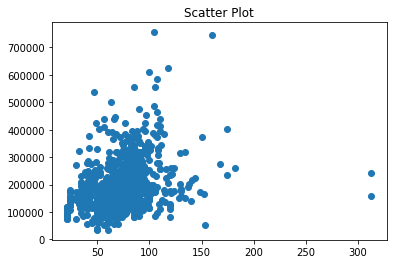


LotArea



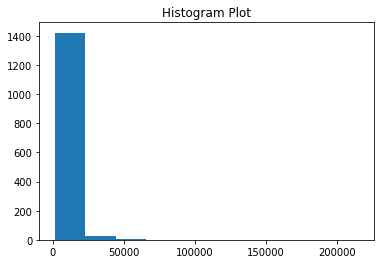

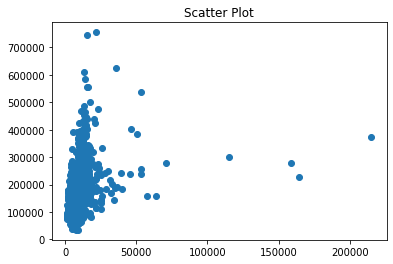


OverallQual



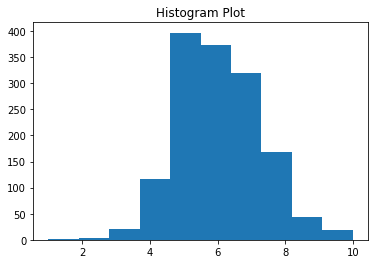

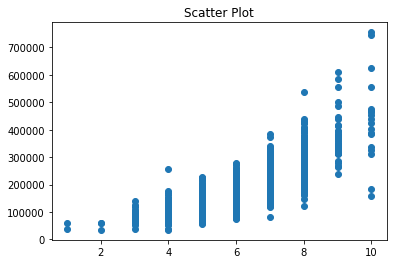


OverallCond



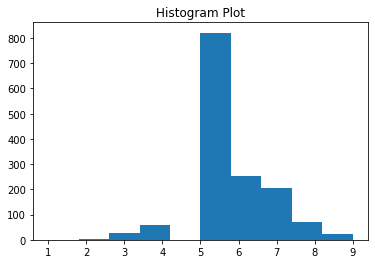

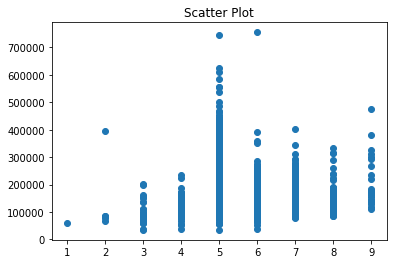


YearBuilt



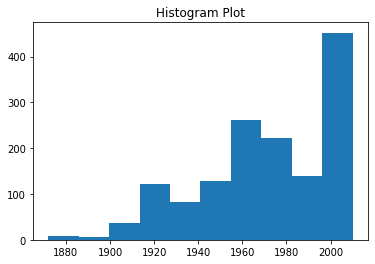

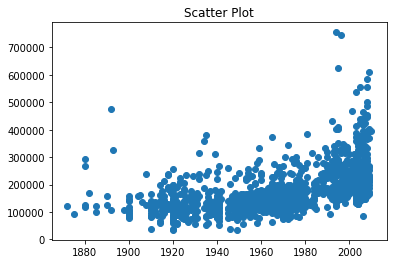


YearRemodAdd



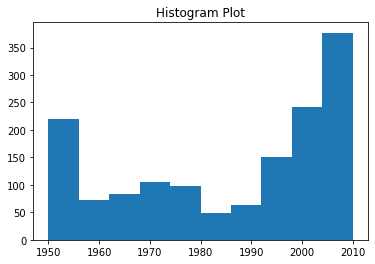

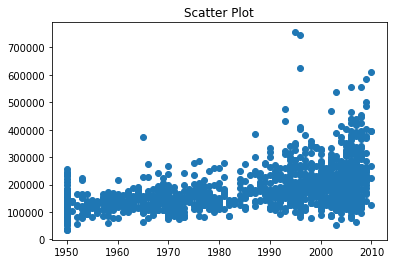


MasVnrArea



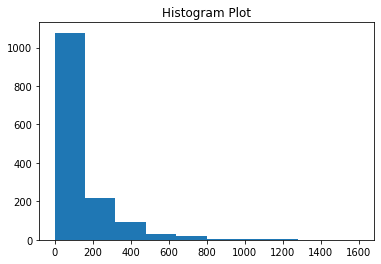

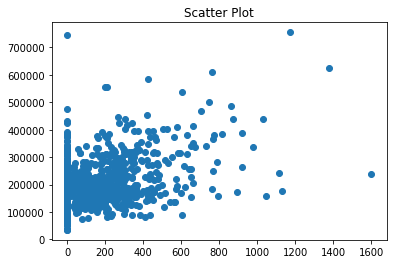


BsmtFinSF1



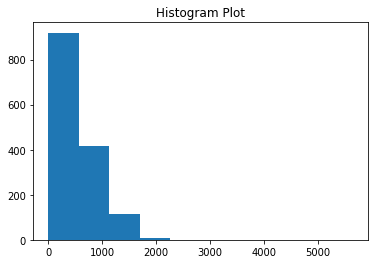

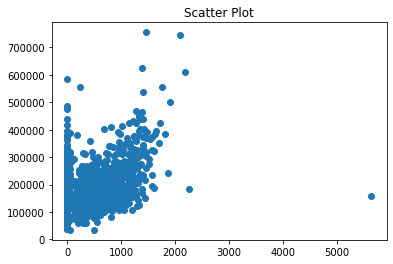


BsmtFinSF2



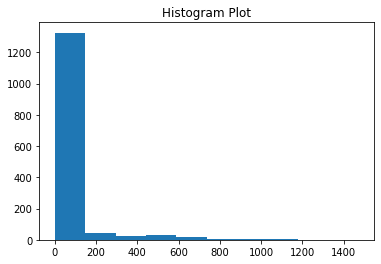

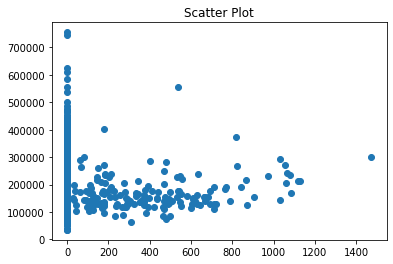


BsmtUnfSF



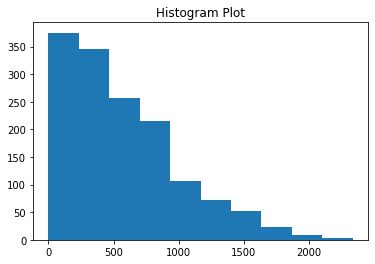

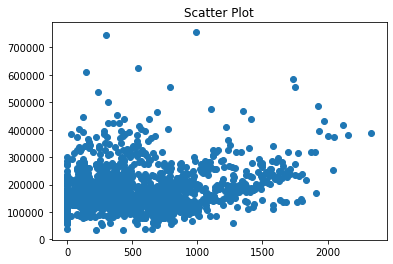


TotalBsmtSF



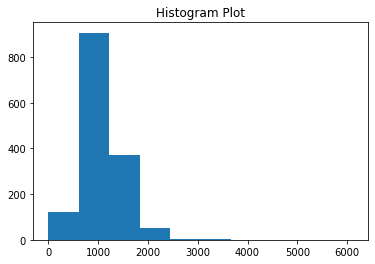

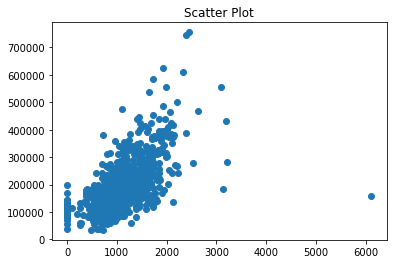


1stFlrSF



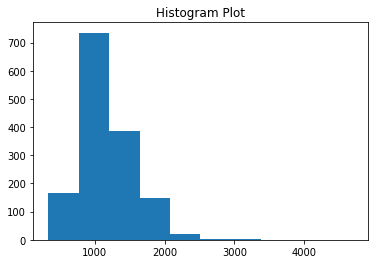

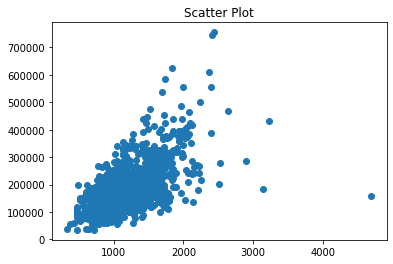


2ndFlrSF



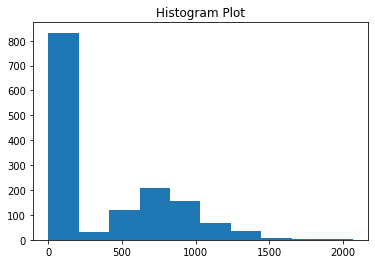

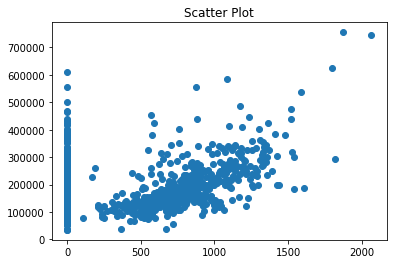


LowQualFinSF



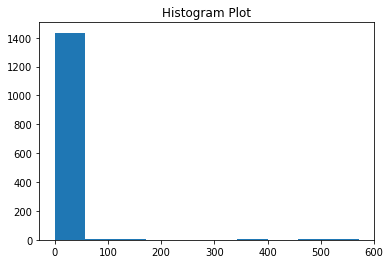

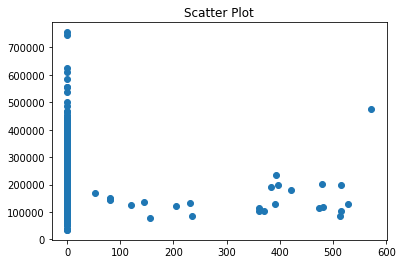


GrLivArea



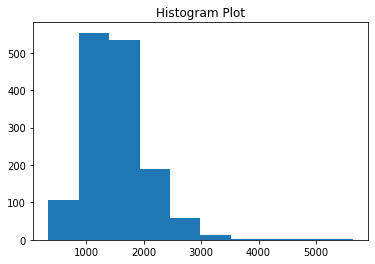

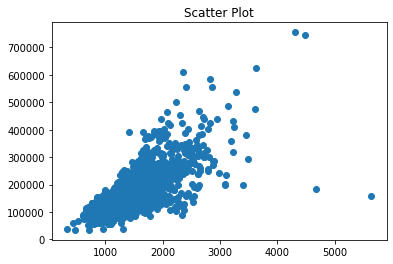


BsmtFullBath



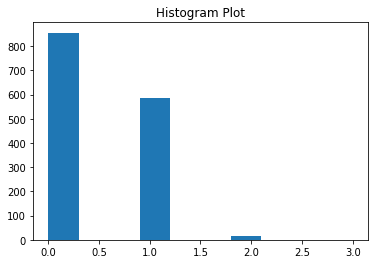

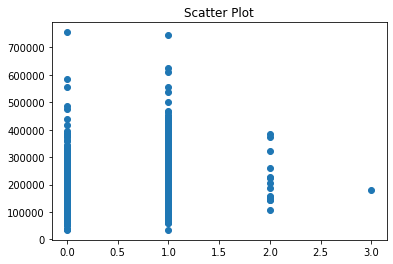


BsmtHalfBath



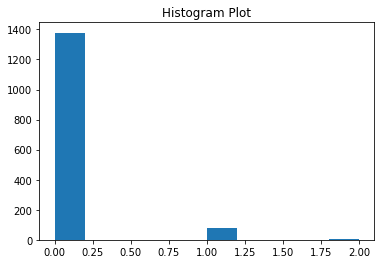

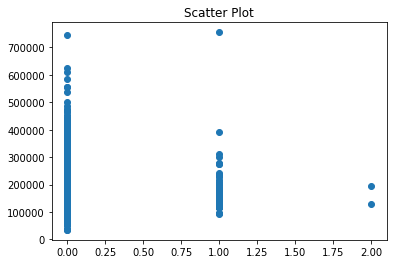


FullBath



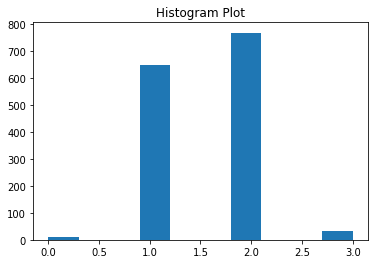

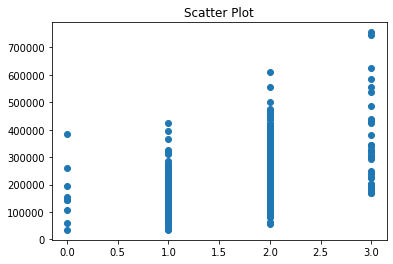


HalfBath



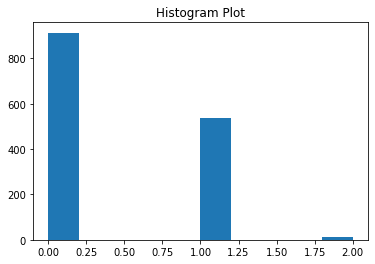

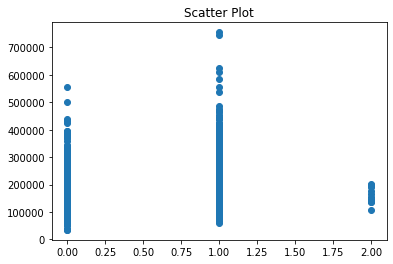


BedroomAbvGr



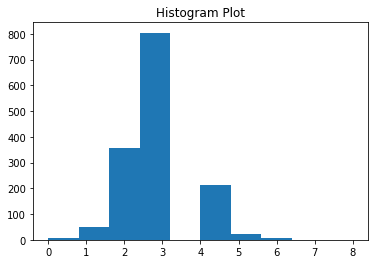

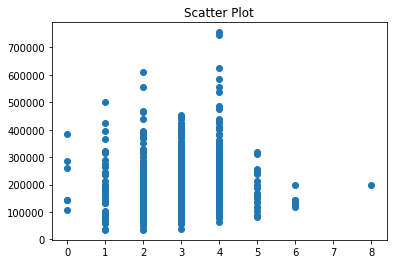


KitchenAbvGr



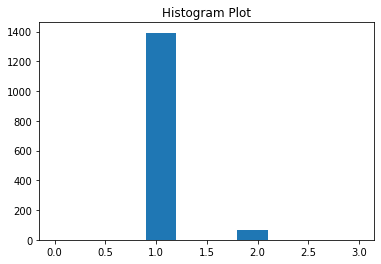

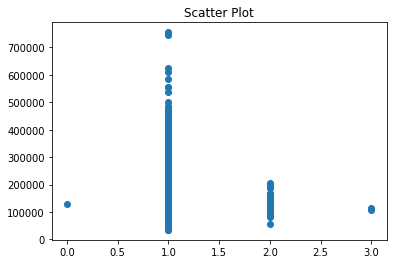


TotRmsAbvGrd



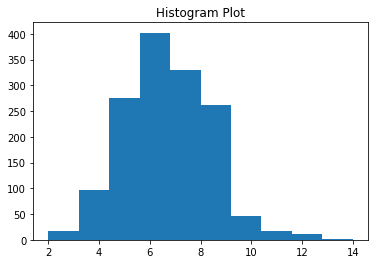

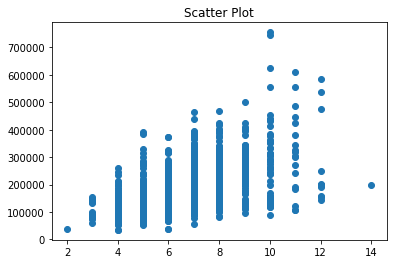


Fireplaces



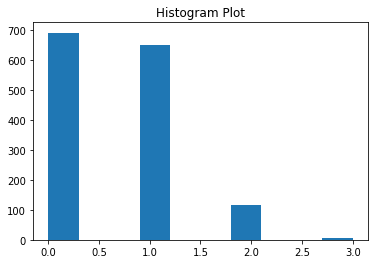

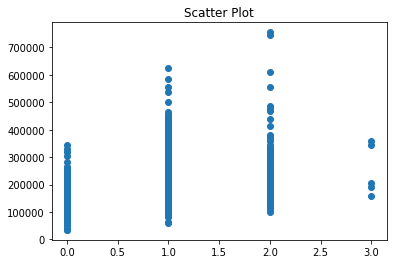


GarageYrBlt



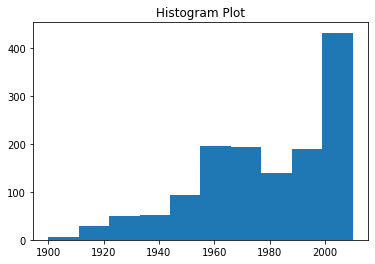

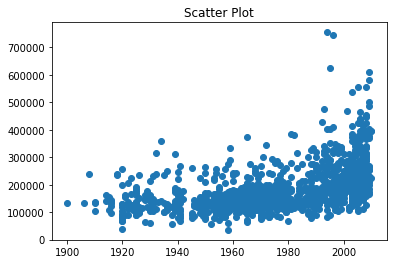


GarageCars



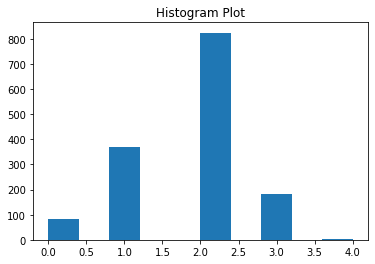

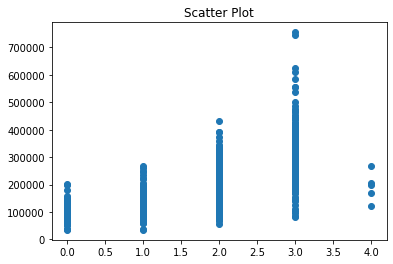


GarageArea



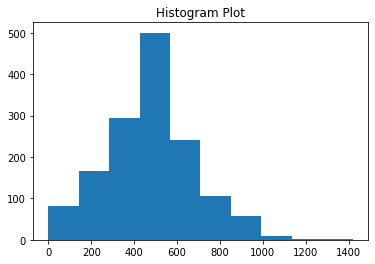

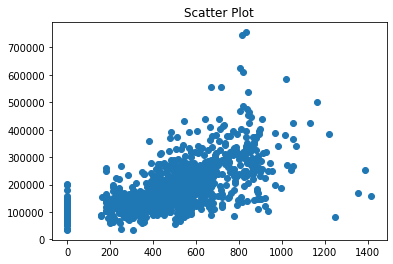


WoodDeckSF



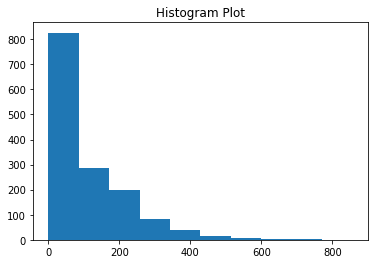

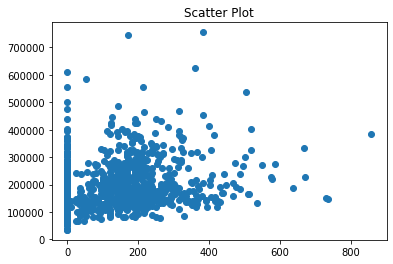


OpenPorchSF



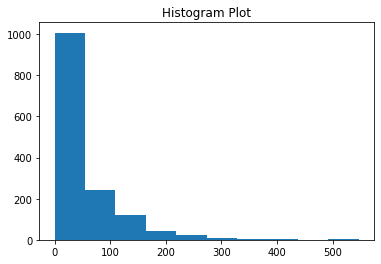

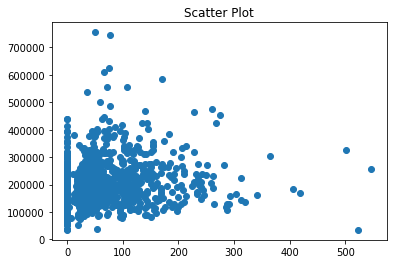


EnclosedPorch



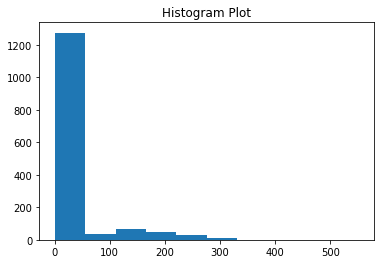

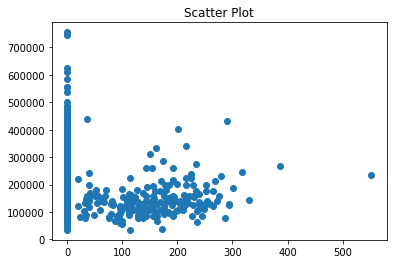


3SsnPorch



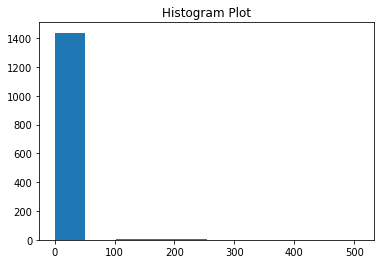

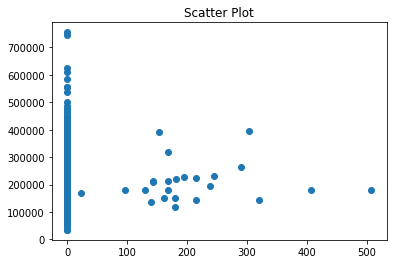


ScreenPorch



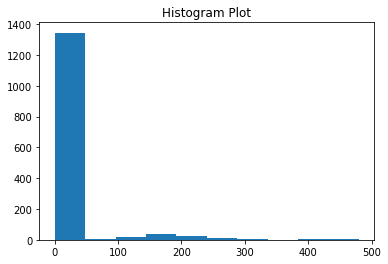

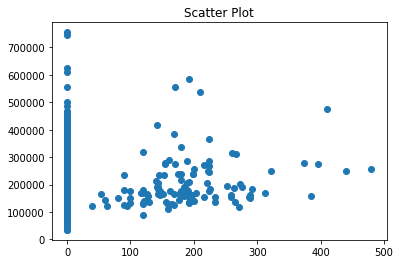


PoolArea



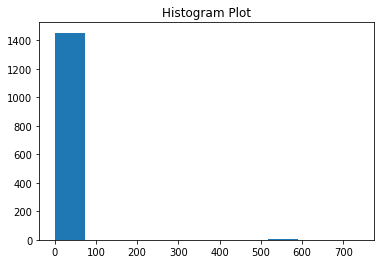

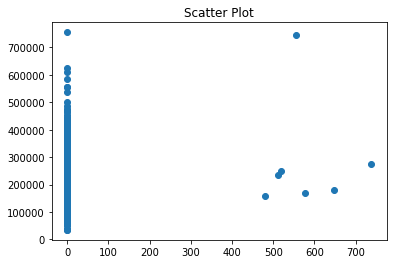


MiscVal



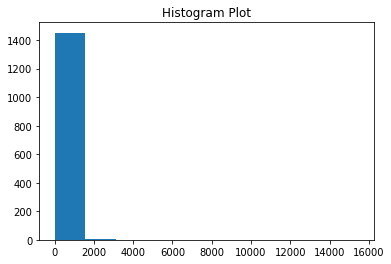

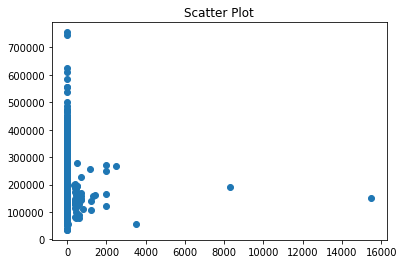


MoSold



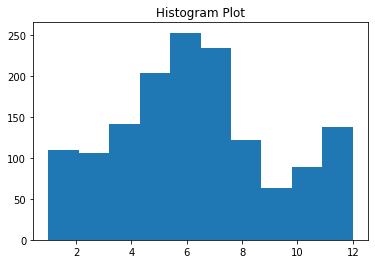

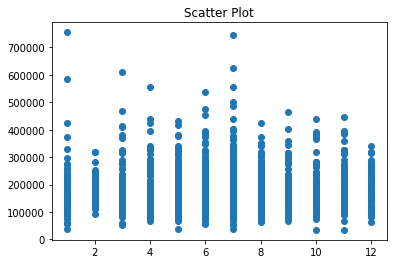


YrSold



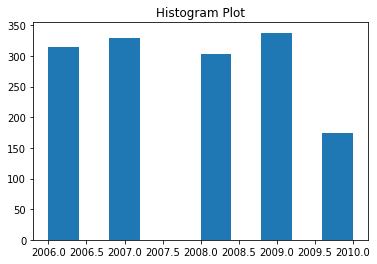

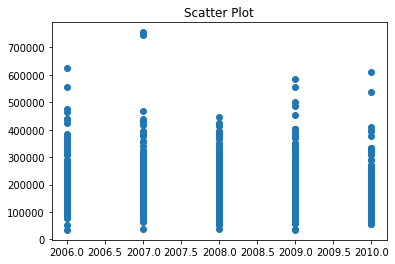


SalePrice



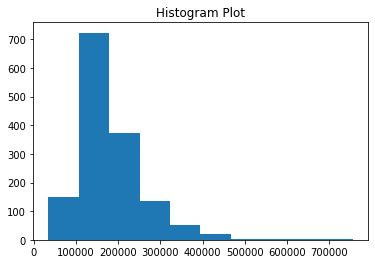

In [5]:
import pandas as pd

df = pd.read_csv("/content/Q1_dataset.csv")

# part C a 
for col in df.columns:
  if df[col].dtype != object and col != 'Id':
    print("\n{}\n".format(col, df[col].dtype))
    plt.hist(df[col])
    plt.title("Histogram Plot")
    plt.show()
    if col != 'SalePrice':
      plt.scatter(df[col], df['SalePrice'])
      plt.title("Scatter Plot")
      plt.show()


In [6]:
# part C b & c
df['z_score_SalePrice'] = abs((df['SalePrice'] - df['SalePrice'].mean())/df['SalePrice'].std())

thresholds = [2, 2.5, 3, 3.5]

# threshold A
for threshold in thresholds:
  print("Threshold Value {}".format(threshold))
  print("Outliers {}".format(df.loc[df['z_score_SalePrice'] > threshold, 'SalePrice'].values.tolist()))
  print("Number of Outliers {}".format(len(df.loc[df['z_score_SalePrice'] > threshold, 'SalePrice'].values.tolist())))


Threshold Value 2
Outliers [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 340000, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 340000, 394617]
Number of Outliers 63
Threshold Value 2.5
Outliers [385000, 438780, 383970, 412500, 501837, 475000, 386250, 403000, 415298, 437154, 394432, 426000, 555000, 440000, 380000, 430000, 402861, 446261, 451950, 402000, 423000, 392000, 755000, 538000, 395000, 485000, 582933, 385000, 611657, 395192, 556581, 424870, 625000, 392500, 745000, 465000, 381000, 410000, 466500, 394617]
Number of Outliers 40
Threshold Value 3
Outliers [438780, 501837, 475000, 437154, 426000, 555000

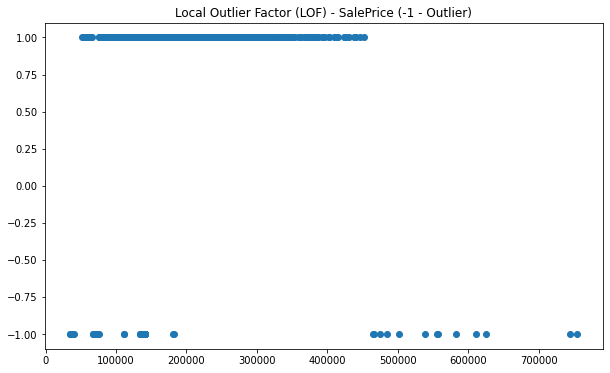

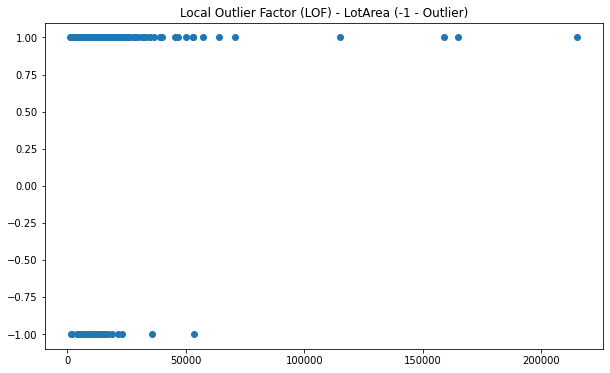

In [7]:
# part d

from sklearn.neighbors import LocalOutlierFactor

# Fit the model and predict outlier scores
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(df['SalePrice'].values.reshape(-1,1))
color_map = {1: 'red', -1: 'orange'}
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['SalePrice'], y_pred)
plt.title("Local Outlier Factor (LOF) - SalePrice (-1 - Outlier)")
plt.show()

# Fit the model and predict outlier scores
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(df['SalePrice'].values.reshape(-1,1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['LotArea'], y_pred)
plt.title("Local Outlier Factor (LOF) - LotArea (-1 - Outlier)")
plt.show()


## 2. PCA 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/Q2_dataset.csv")
target = 'class'

# drop id column
data.drop('id', axis=1, inplace=True)

In [38]:
# split dataset into features and target column
X = data.loc[:, data.columns != 'class']
y = data['class']

# split dataset - ensure labels have similar distribution in training and testing datasets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size =0.2, stratify=y, random_state=123)

# standardize training and test datasets
for col in xtrain.columns:
  scale = StandardScaler()
  xtrain[col] = scale.fit_transform(xtrain[col].values.reshape(-1,1))
  xtest[col] = scale.transform(xtest[col].values.reshape(-1,1))


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# before PCA we fit the model on the training data
model = LogisticRegression(random_state=123)
model.fit(xtrain, ytrain)

# predict using the model fit on the data
pred = model.predict(xtest)

# precision/ recall/ f1 score
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        45
           1       0.88      0.93      0.90       107

    accuracy                           0.86       152
   macro avg       0.84      0.81      0.82       152
weighted avg       0.85      0.86      0.85       152



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import numpy as np

xtrain_pca = xtrain.copy()
xtest_pca = xtest.copy()

# mean of the training data
mean_train_data = np.mean(xtrain, axis = 0)

# calculating the covariance matrix
cov = np.cov(xtrain_pca, rowvar = False)

# getting the eigenvalues and eigenvectors
eval , eig = np.linalg.eigh(cov)

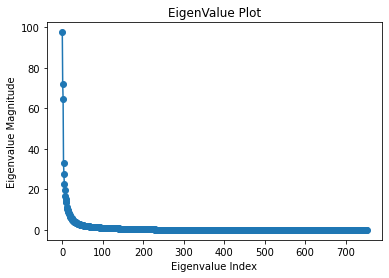

In [45]:
# sort the eigenvalues
idx = np.argsort(eval)[::-1]

eig = eig[:,idx]
eval = eval[idx]


plt.plot(eval, marker='o')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('EigenValue Plot')
plt.show()

In [46]:
# select the first 6 principal components
num_components = 6
components = eig[:, :num_components]

#centering the data
xtrain_pca -= mean_train_data
xtest_pca -= mean_train_data

train_projections = np.dot(xtrain_pca, components)
test_projections = np.dot(xtest_pca, components)

In [48]:
# before PCA we fit the model on the training data
model = LogisticRegression(random_state=123, max_iter=1000)
model.fit(train_projections, ytrain)

# predict using the model fit on the data
pred = model.predict(test_projections)

# precision/ recall/ f1 score
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        33
           1       0.92      0.87      0.90       119

    accuracy                           0.84       152
   macro avg       0.77      0.80      0.78       152
weighted avg       0.85      0.84      0.85       152



## 3. EM Algorithm 

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```


class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```


```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

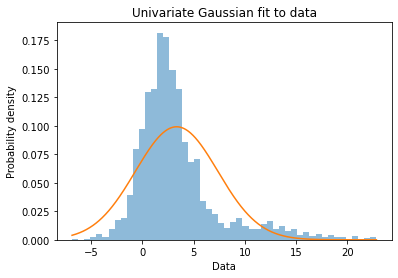

In [ ]:
# Generate data
random_seed = 36784765
np.random.seed(random_seed)
Mean1 = 9.0
Standard_dev1 = 5.0
Mean2 = 2.0
Standard_dev2 = 2.0
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data = np.append(y1, y2)

# Calculate mu and sigma values using data
mu = np.mean(data)
sigma = np.std(data)

# Define Gaussian class
class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def pdf(self, datum):
        """Probability of a data point given the current parameters"""
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(self.sigma))) * np.exp(-u * u / 2)
        return y

# Instantiate Gaussian object and plot PDF
gaussian = Gaussian(mu, sigma)
x = np.linspace(min(data), max(data), 1000)
# plot histogram
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, gaussian.pdf(x))
plt.xlabel('Data')
plt.ylabel('Probability density')
plt.title('Univariate Gaussian fit to data')
plt.show()

Iteration 1 Log-likelihood -9.992007221626409e-16
Iteration 2 Log-likelihood -3.83026943495679e-14
Iteration 3 Log-likelihood -3.785860513971784e-14
Iteration 4 Log-likelihood -4.39648317751562e-14
Iteration 5 Log-likelihood -3.9190872769268026e-14
Iteration 6 Log-likelihood -3.697042672001771e-14
Iteration 7 Log-likelihood -3.9745984281580604e-14
Iteration 8 Log-likelihood -3.697042672001771e-14
Iteration 9 Log-likelihood -3.8746783559417963e-14
Iteration 10 Log-likelihood -3.708144902248023e-14
Iteration 11 Log-likelihood -3.352873534367973e-14
Iteration 12 Log-likelihood -3.319566843629218e-14
Iteration 13 Log-likelihood -3.3306690738754696e-14
Iteration 14 Log-likelihood -3.808064974464287e-14
Iteration 15 Log-likelihood -4.1522341120980855e-14
Iteration 16 Log-likelihood -3.774758283725532e-14
Iteration 17 Log-likelihood -3.952393967665557e-14
Iteration 18 Log-likelihood -4.0523140398818214e-14
Iteration 19 Log-likelihood -3.7969627442180354e-14
Iteration 20 Log-likelihood -3.1752

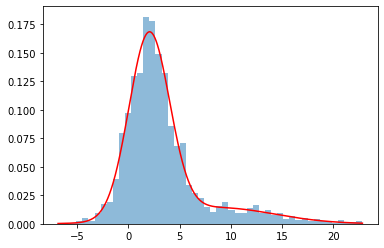

In [ ]:
from scipy.stats import norm

# Generate data
random_seed = 36784765
np.random.seed(random_seed)
Mean1 = 9.0
Standard_dev1 = 5.0
Mean2 = 2.0
Standard_dev2 = 2.0
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data = np.append(y1, y2)

class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        # store data in self. data
        self.data = data
        # store min and max mu value
        self.mu = [mu_min, mu_max]
        # store min and max sigma value
        self.sigma = [sigma_min, sigma_max]
        self.mix = mix
        # initialize weights
        self.weights = np.zeros((len(data), 2))

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        for i in range(len(self.data)):
            # Use norm to find min/ max likelihoods
            likelihood1 = norm.pdf(self.data[i], self.mu[0], self.sigma[0])
            likelihood2 = norm.pdf(self.data[i], self.mu[1], self.sigma[1])
            # calculate weights
            self.weights[i, 0] = likelihood1 * (1 - self.mix) / (likelihood1 * (1 - self.mix) + likelihood2 * self.mix)
            self.weights[i, 1] = likelihood2 * self.mix / (likelihood1 * (1 - self.mix) + likelihood2 * self.mix)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # sum the weights
        weights_sum = np.sum(weights, axis=0)
        # calculate mix value
        self.mix = weights_sum[1] / (weights_sum[0] + weights_sum[1])
        # recalculate mu and sigma values
        self.mu[0] = np.sum(weights[:, 0] * self.data) / weights_sum[0]
        self.mu[1] = np.sum(weights[:, 1] * self.data) / weights_sum[1]
        self.sigma[0] = np.sqrt(np.sum(weights[:, 0] * (self.data - self.mu[0]) ** 2) / weights_sum[0])
        self.sigma[1] = np.sqrt(np.sum(weights[:, 1] * (self.data - self.mu[1]) ** 2) / weights_sum[1])

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        log_likelihood = []
        # in each iteration run Estep followed by Mstep and store log likelihood
        for i in range(N):
            self.Estep()
            self.Mstep(self.weights)
            log_likelihood.append(np.sum(np.log(np.sum(self.weights, axis=1))))
            if verbose:
                print("Iteration", i+1, "Log-likelihood", log_likelihood[-1])
        return log_likelihood

    def pdf(self, x):
        "Return the probability density function of the mixture model"
        return self.mix * norm.pdf(x, self.mu[1], self.sigma[1]) + (1 - self.mix) * norm.pdf(x, self.mu[0], self.sigma[0])

# Fit the model
model = GaussianMixture_self(data)
model.iterate(100, verbose=True)

# # Plot the PDF
x = np.linspace(min(data), max(data), 1000)
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, model.pdf(x), 'r')
plt.show()
